In [1]:
import os
import sys
import numpy as np

sys.path.append('/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

In [2]:
# os.chdir('../../')
os.getcwd()

'/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats'

## 1. Load the tissue dataframes

In [3]:
# Load dataframes
out_root_path = '../outputs/outputs_v4'
df_files = [
    # 'output_bladder_control_curated_segmentation_s_10_e_6_d_8/cell_stats/stats_dataset_bladder.csv',
    'output_esophagus_Z2_curated_crop_s_10_e_6_d_8/cell_stats/stats_dataset_esophagus.csv',
    'output_intestine_sample2_b_curated_segmentation_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_intestine_villus.csv',
    'output_lung_new_sample_b_curated_segmentation_central_crop_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_lung_bronchiole.csv',
    'output_lung_pseudostratified_from_harold_s_10_e_6_d_8/cell_stats/stats_dataset_lung.csv'
]
df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,principal_axis_and_elongation,neighbors,...,area_2D_principal,neighbors_of_neighbors_2D_principal,slices_principal,isoperimetric_ratio,num_neighbors,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area,num_neighbors_2D
0,1,esophagus,stratified_squamous,./run_euler/outputs/output_esophagus_Z2_curate...,./run_euler/outputs/output_esophagus_Z2_curate...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,esophagus,stratified_squamous,./run_euler/outputs/output_esophagus_Z2_curate...,./run_euler/outputs/output_esophagus_Z2_curate...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,esophagus,stratified_squamous,./run_euler/outputs/output_esophagus_Z2_curate...,./run_euler/outputs/output_esophagus_Z2_curate...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,esophagus,stratified_squamous,./run_euler/outputs/output_esophagus_Z2_curate...,./run_euler/outputs/output_esophagus_Z2_curate...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,esophagus,stratified_squamous,./run_euler/outputs/output_esophagus_Z2_curate...,./run_euler/outputs/output_esophagus_Z2_curate...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,143,lung,pseudostratified,./run_euler/outputs/output_lung_pseudostratifi...,./run_euler/outputs/output_lung_pseudostratifi...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
774,144,lung,pseudostratified,./run_euler/outputs/output_lung_pseudostratifi...,./run_euler/outputs/output_lung_pseudostratifi...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
775,145,lung,pseudostratified,./run_euler/outputs/output_lung_pseudostratifi...,./run_euler/outputs/output_lung_pseudostratifi...,False,599.473045,634.87,"(3.246723882595441, array([ 0.12065244, -0.992...","[3, 8, 14, 15, 23, 30, 33, 47, 68, 85, 105, 13...",...,"[31.760000000000005, 32.07000000000001, 32.370...","{5: [[7, 8, 6, 5, 7], [7, 8, 7, 5, 7], [7, 8, ...","([[887.9717210304091, 338.20629710368684, 282....",534.489735,13,0.923124,"[21.53937533, 137.19213025, 47.04842169, 8.227...",49.981229,649.755982,"[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, ..."
776,146,lung,pseudostratified,./run_euler/outputs/output_lung_pseudostratifi...,./run_euler/outputs/output_lung_pseudostratifi...,True,NaN,NaN,"(None, None)",[],...,[],{},(),NaN,0,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
import ast

# If using v4 of collected statistics run this cell 
cell_stats_df['principal_axis_and_elongation'] = cell_stats_df['principal_axis_and_elongation'].apply(
    lambda x: x.split(',')[0].replace('(', '')
)
cell_stats_df['principal_axis_and_elongation'] = cell_stats_df['principal_axis_and_elongation'].apply(
    lambda x: ast.literal_eval(x)
)
cell_stats_df['elongation'] = cell_stats_df['principal_axis_and_elongation']
cell_stats_df.drop(columns=['principal_axis_and_elongation'], inplace=True)

cell_stats_df["num_neighbors_2D_principal"] = cell_stats_df['neighbors_2D_principal'].apply(lambda x: [len(l) for l in x])

## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [5]:
# Rename columns
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['area'],
    new_names=['surface_area']
)

In [6]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 4 volume outliers in esophagus sample,
of which:
    - Below lower bound: 2,
    - Above upper bound: 2. 
        
Found a total of 12 volume outliers in intestine_villus sample,
of which:
    - Below lower bound: 6,
    - Above upper bound: 6. 
        
Found a total of 8 volume outliers in lung_bronchiole sample,
of which:
    - Below lower bound: 4,
    - Above upper bound: 4. 
        
Found a total of 4 volume outliers in lung sample,
of which:
    - Below lower bound: 2,
    - Above upper bound: 2. 
        


In [8]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 292 records containing NAs.


In [9]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,cell_ID,tissue,tissue_type,exclude_cell,volume,isoperimetric_ratio,num_neighbors,contact_area_fraction,mean_contact_area,elongation,surface_area,is_outlier
11,12,esophagus,stratified_squamous,False,-1.458862,3.784891,-1.905238,1.804732,-1.545014,-0.384693,-1.906665,True
22,23,esophagus,stratified_squamous,False,0.483214,-0.366515,0.540310,-3.599896,-0.648133,-0.720069,0.376199,True
23,24,esophagus,stratified_squamous,False,-0.481202,-0.567452,0.540310,-0.838939,-0.780656,-0.800046,-0.555861,False
27,28,esophagus,stratified_squamous,False,-0.993605,-0.433684,-0.376770,-0.328947,-0.847290,-1.100909,-1.045146,False
28,29,esophagus,stratified_squamous,False,-0.403666,-0.637046,0.846003,-0.431263,-0.784266,-0.845677,-0.522664,False
...,...,...,...,...,...,...,...,...,...,...,...,...
762,132,lung,pseudostratified,False,-1.173033,-0.150060,0.234617,1.804732,-1.037372,-0.008488,-1.232270,False
765,135,lung,pseudostratified,False,-0.875499,0.990560,-0.071077,0.922617,-0.527815,2.553595,-0.570451,False
768,138,lung,pseudostratified,False,-1.136596,-0.181455,0.234617,0.271612,-1.083772,-0.539049,-1.181827,False
769,139,lung,pseudostratified,False,-1.112994,0.448435,0.540310,0.919548,-0.990470,1.693573,-1.039074,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [10]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../images/'

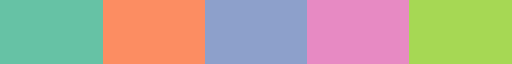

In [11]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195],
    [166,216,84]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

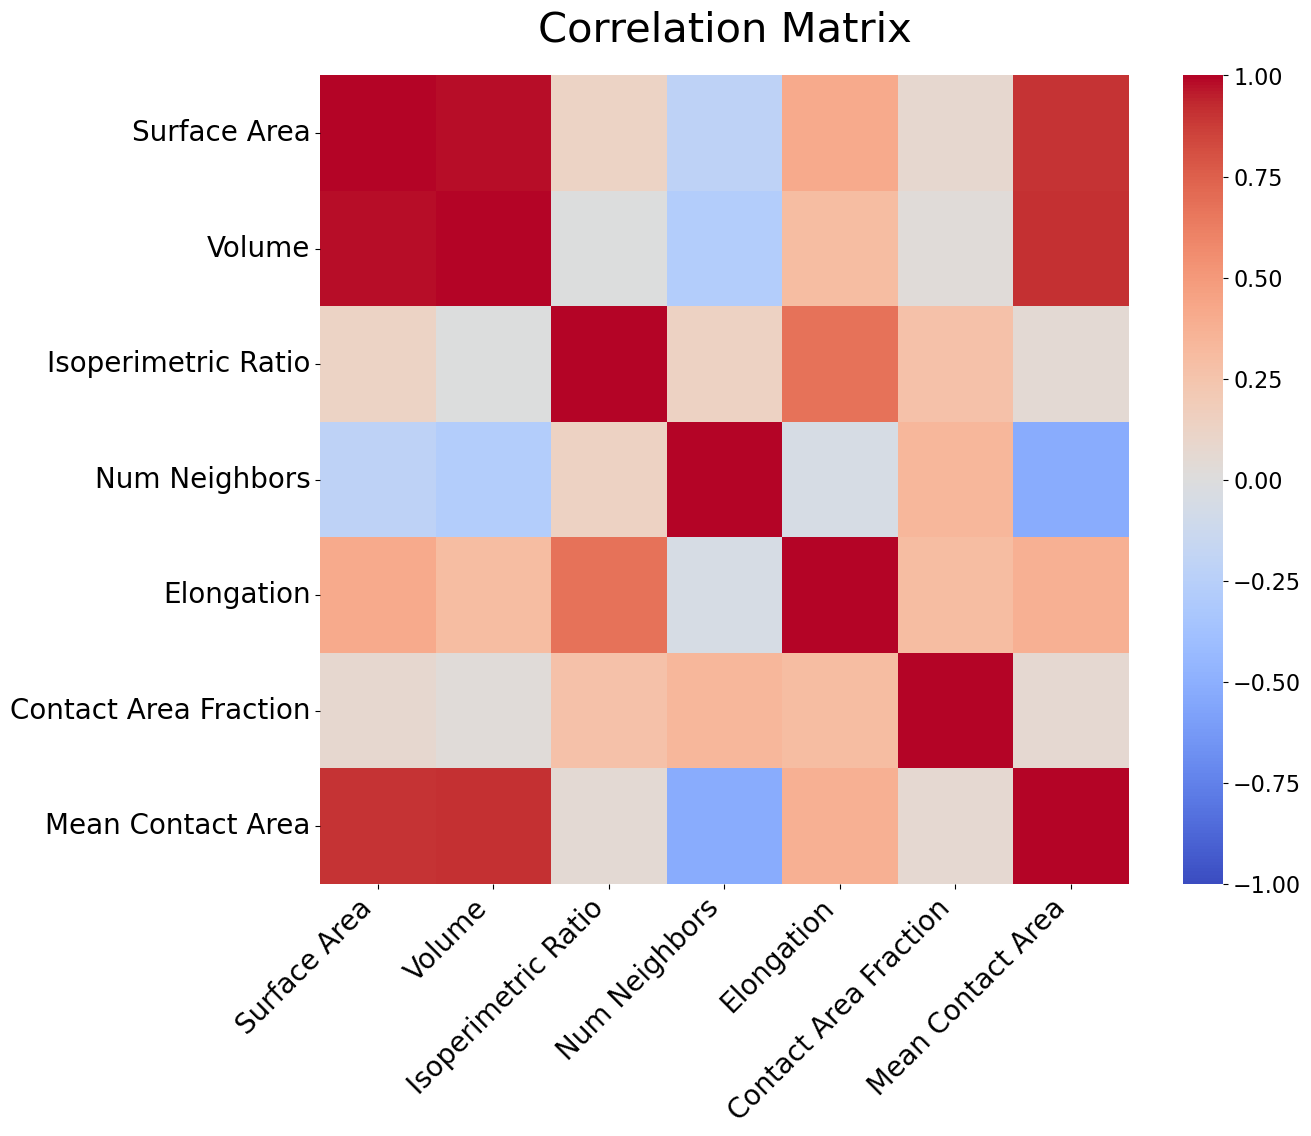

In [12]:
sp.corr_matrix_plot(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = 'coolwarm',
    save_dir=save_plots_dir,
    show=True
)

### 3.2. PCA plots

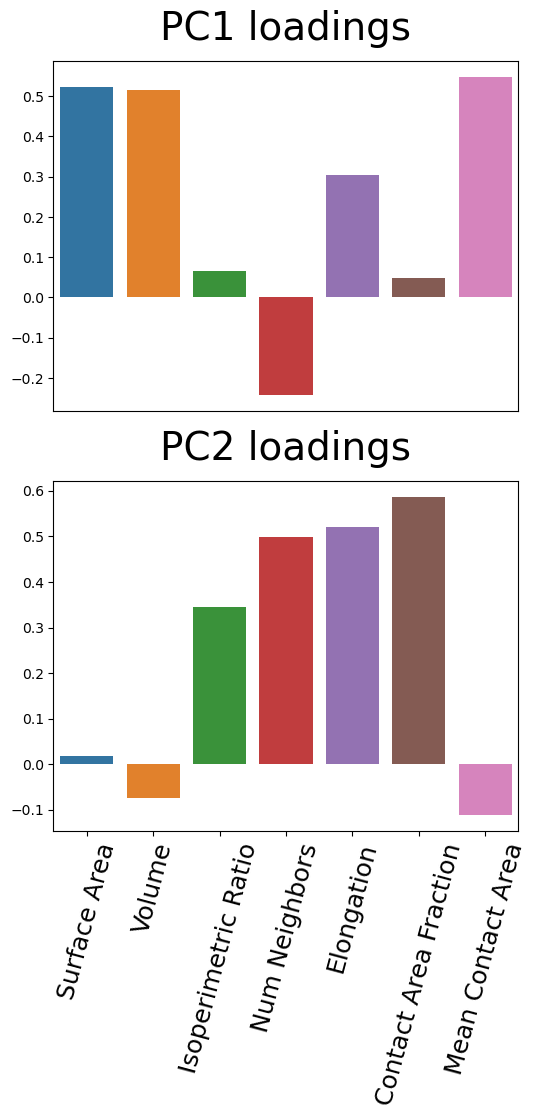

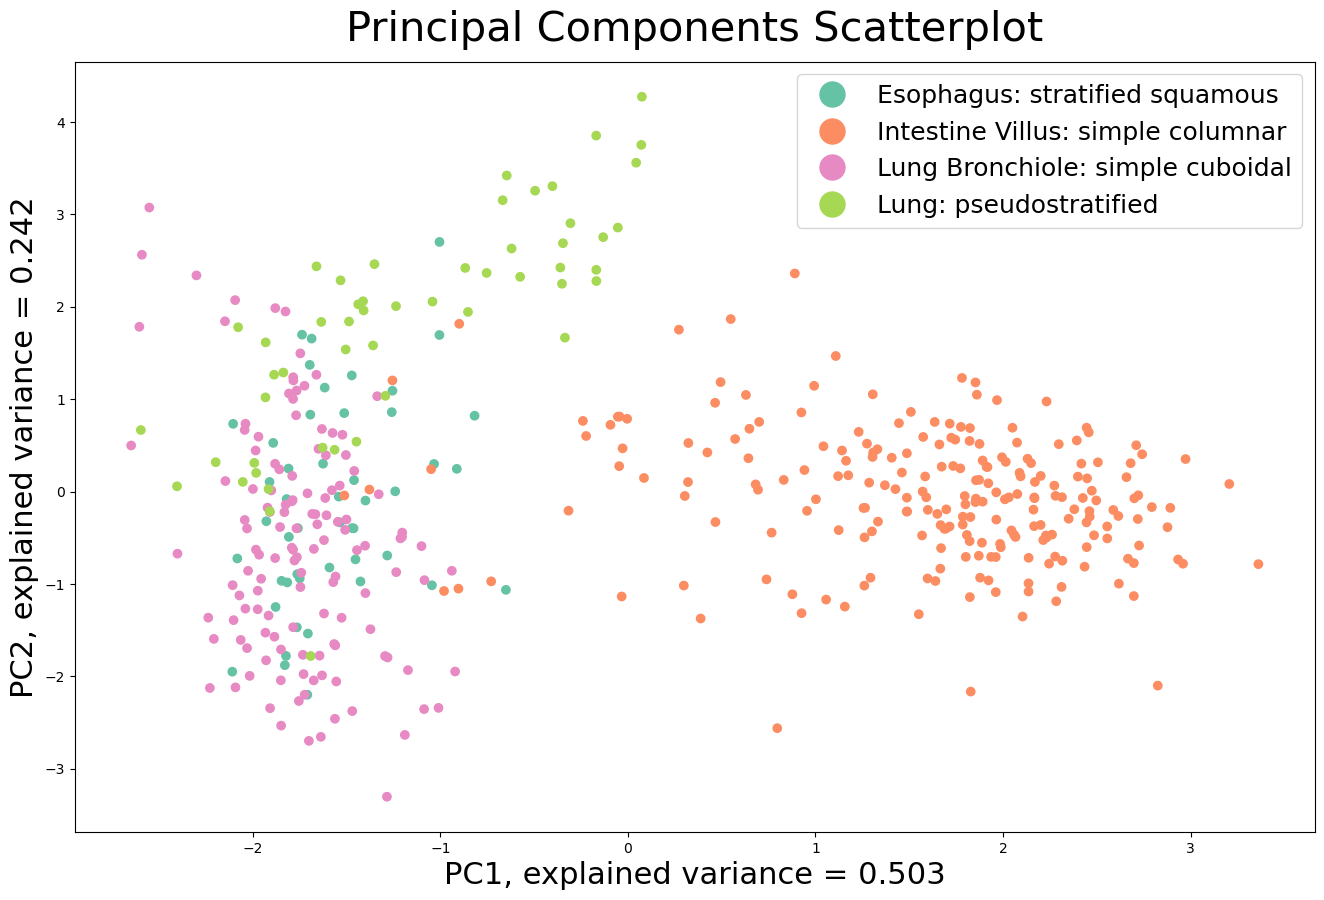

In [13]:
sp.pca_plots(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.3. Grid of kdplots for different numerical features

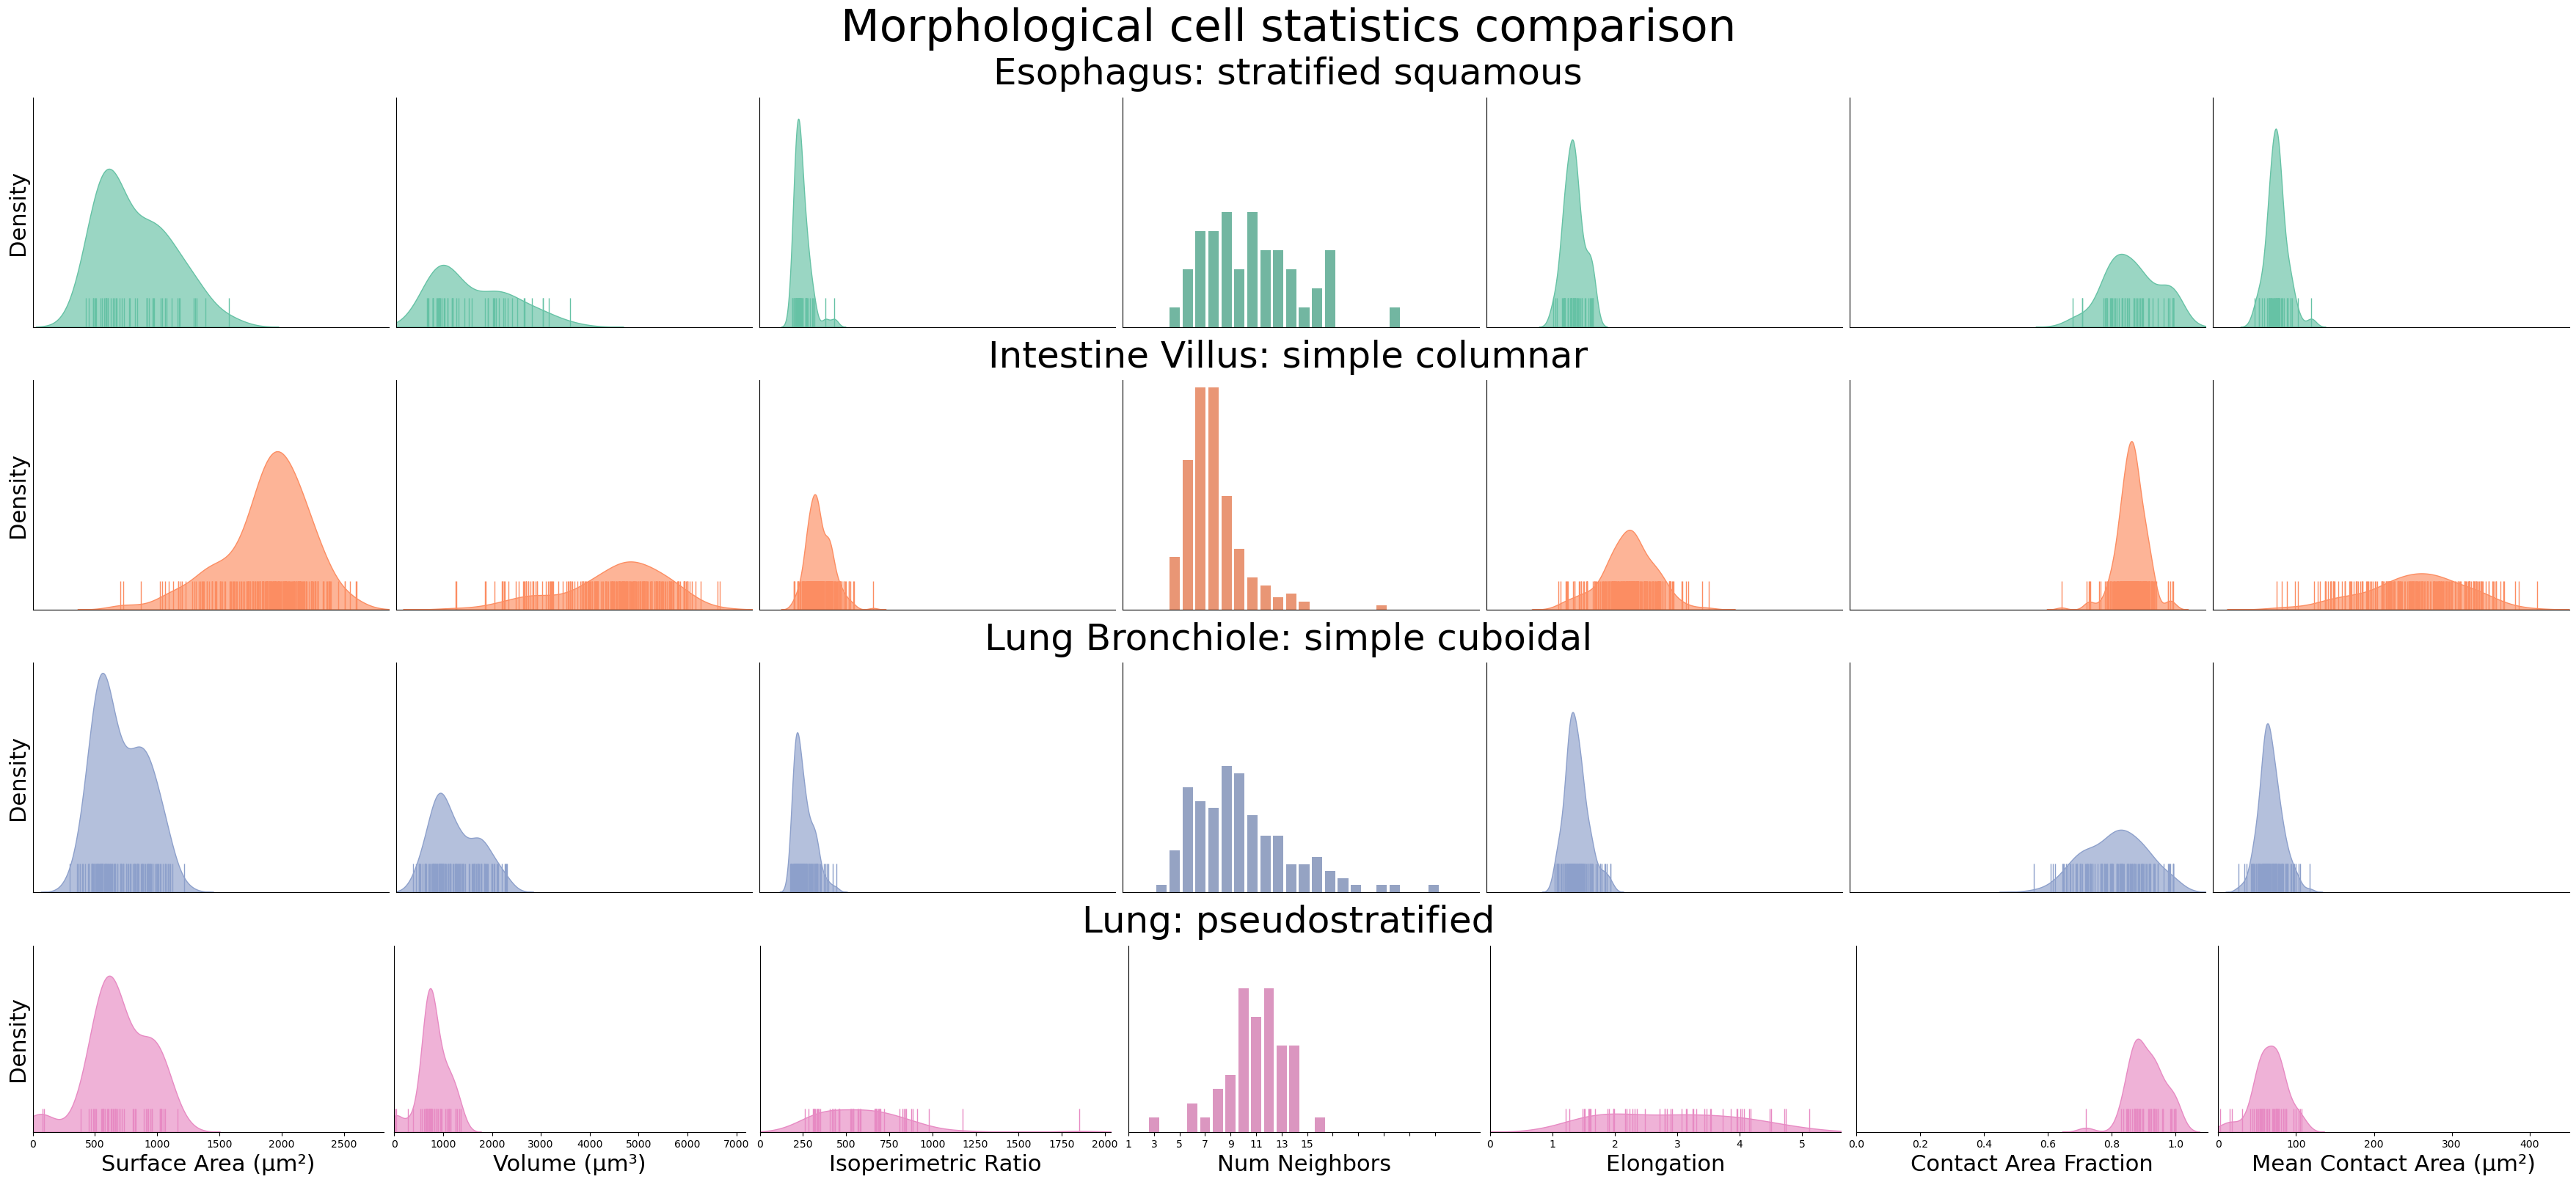

In [14]:
uoms = [
    '\u00B5m' + '\u00B2', 
    '\u00B5m' + '\u00B3', 
    None, 
    None,
    None,
    None,
    '\u00B5m' + '\u00B2'
]

y_lims = [0.002, 0.002, 0.012, 0.25, 3.0, 14, 0.040]

sp.features_grid_kdplots(
    df=numeric_cell_stats_df,
    features=numerical_features,
    y_lims=y_lims,
    remove_outliers=True,
    units_of_measure=uoms,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.4. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats/src/statistics_collection/StatsPlots.py:725: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.8)


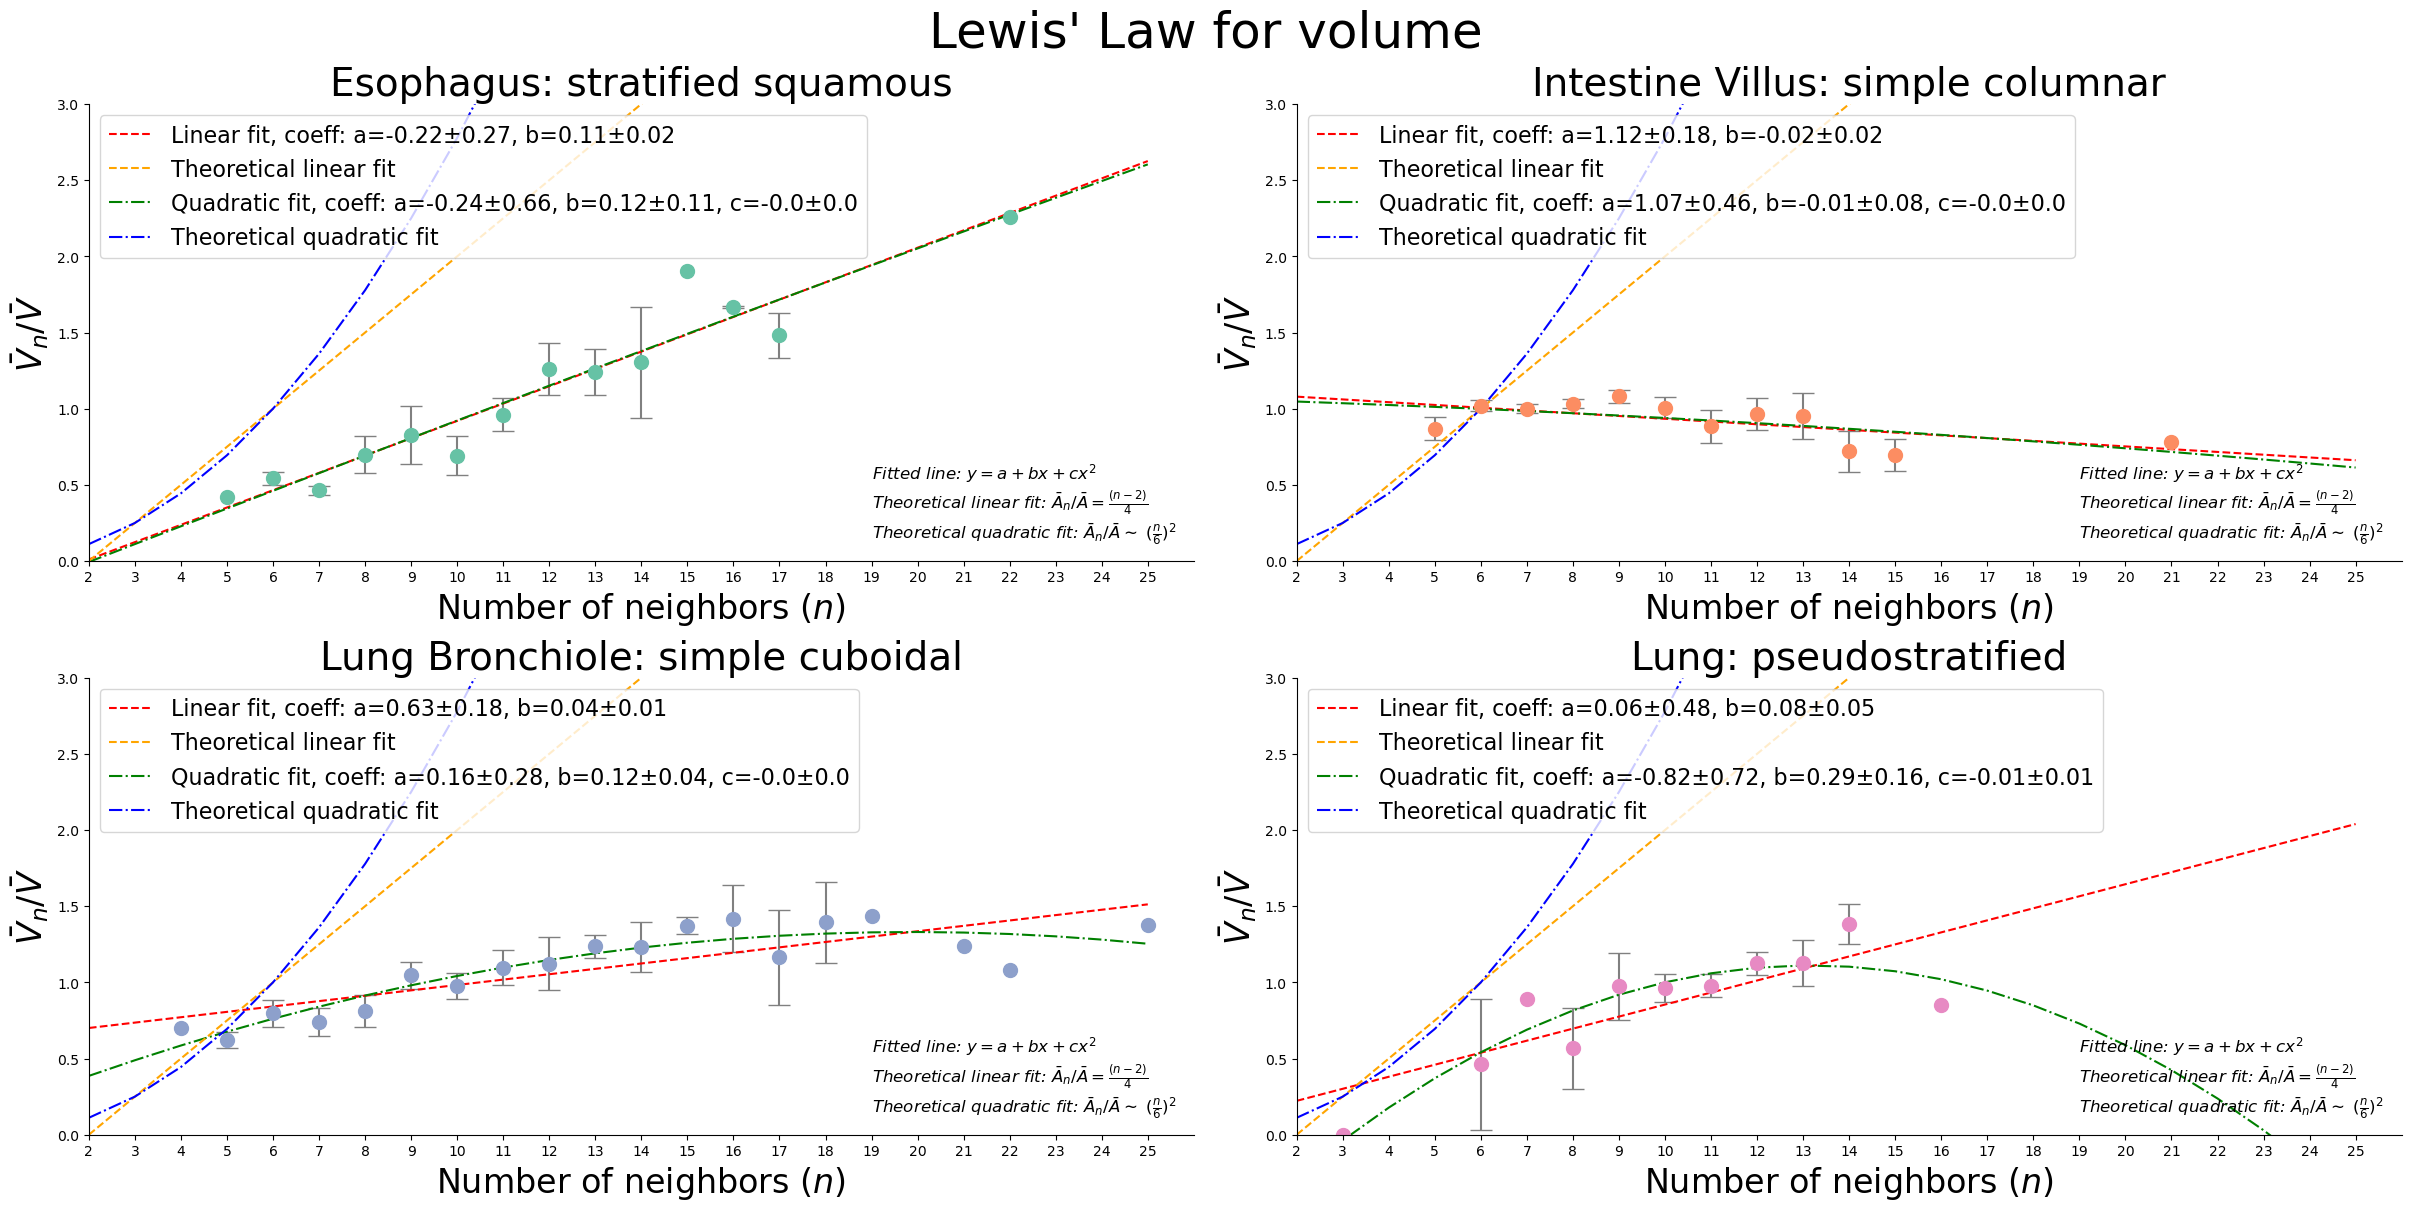

In [18]:
sp.lewis_law_plots(
    df=numeric_cell_stats_df,
    feature='volume',
    fit_degrees=[1,2],
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.5. Violin Plots for individual samples

In [ ]:
sp.violin_plots(
    df=numeric_cell_stats_df, 
    tissue='bladder',
    features=numerical_features,
    units_of_measure='m',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=None, 
    show=True
)

### 3.7. Plots of 2D statistics along standard cartesian axes

#### 3.7.0. Number of 2D neighbors barplots

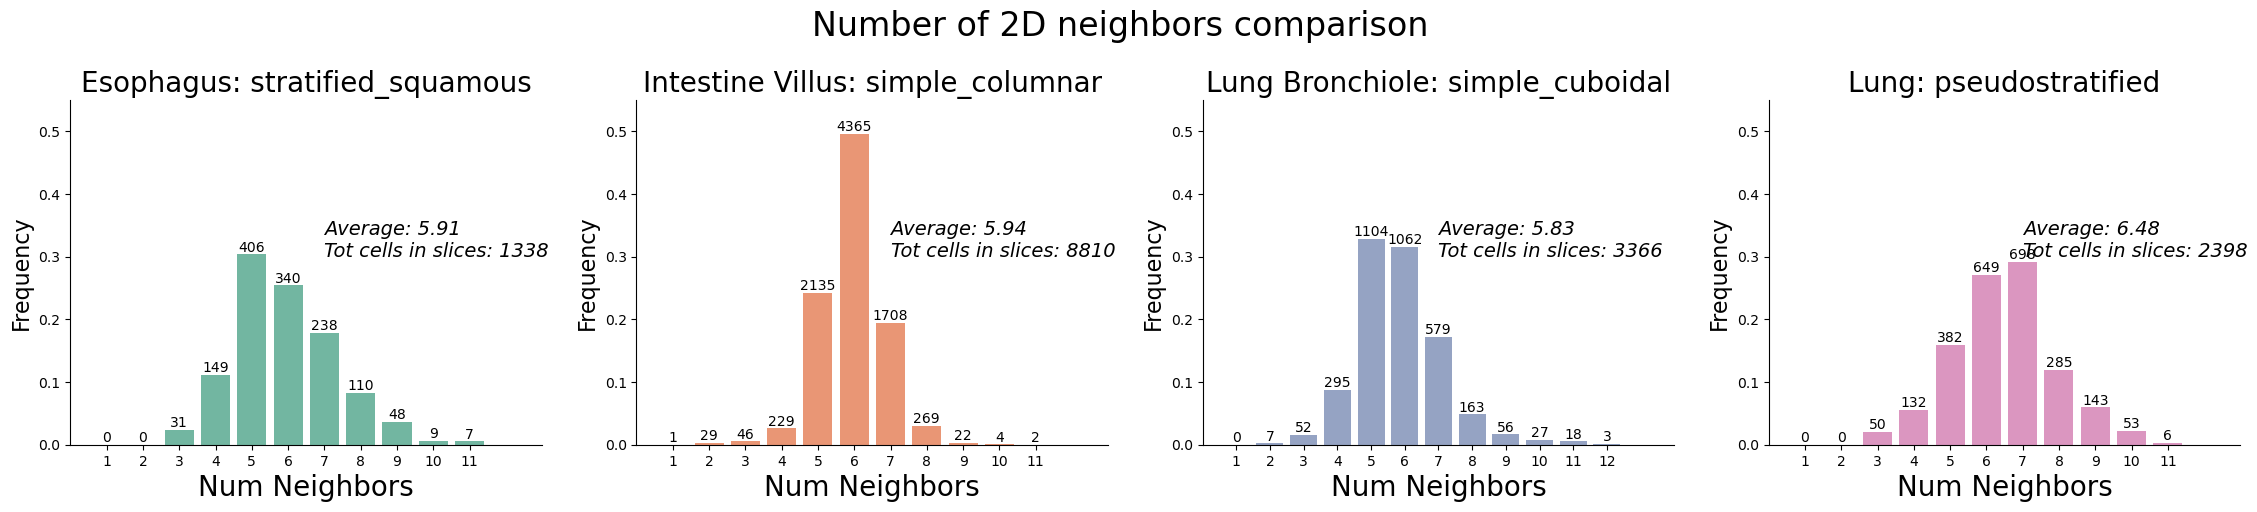

In [17]:
sp.num_neighbors_barplots(
    df=cell_stats_df,
    version='2D',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

#### 3.7.1. Lewis Law plots

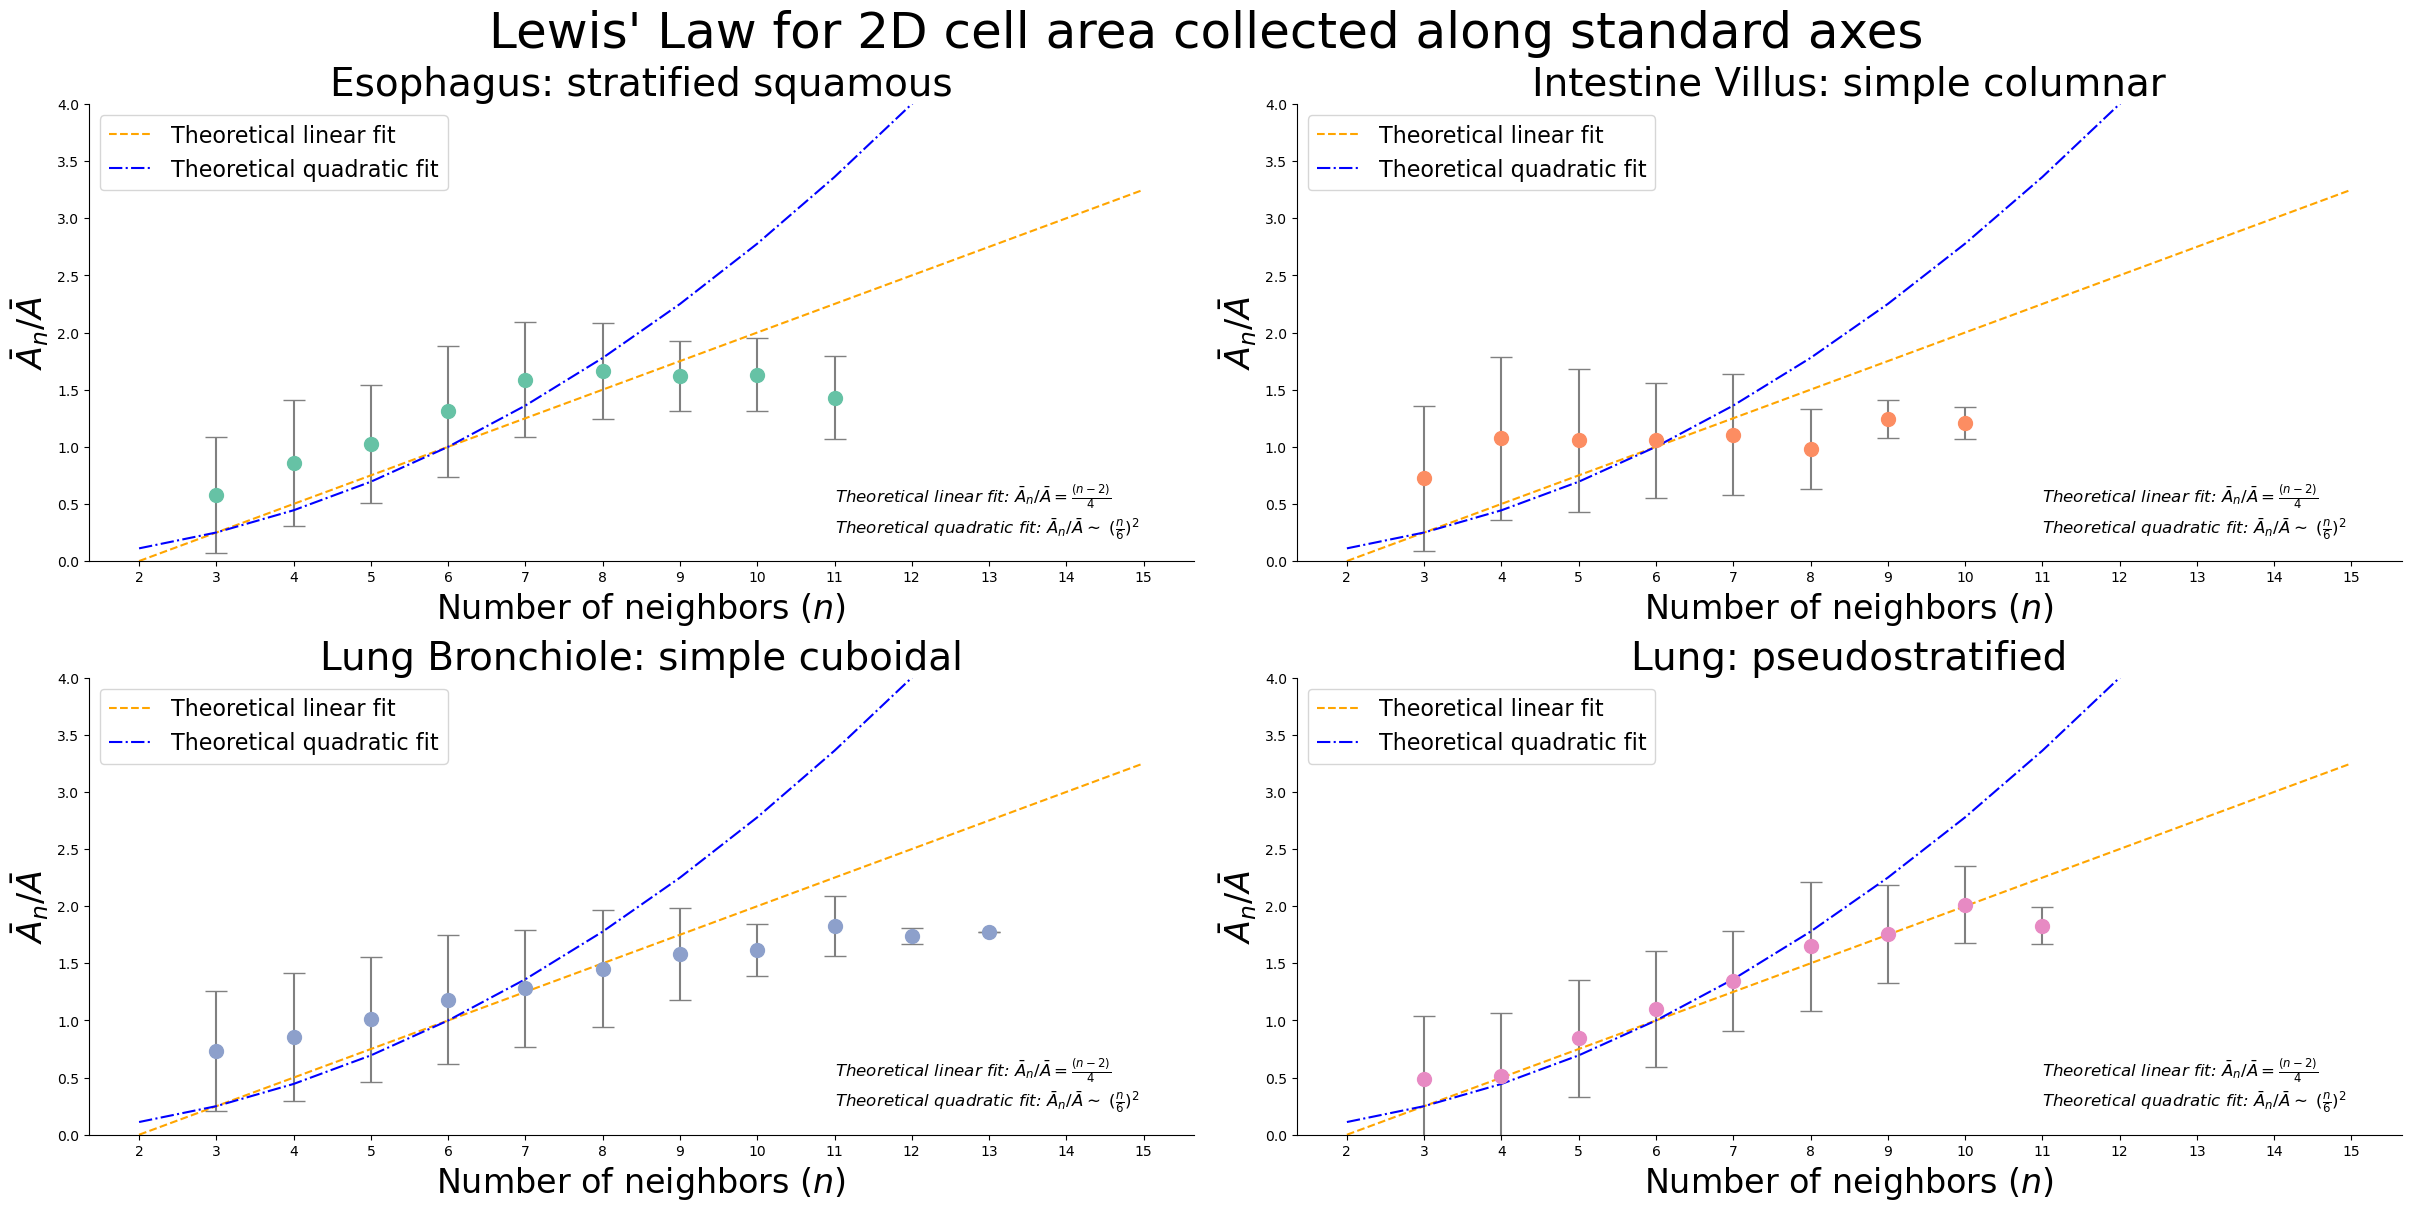

In [19]:
sp.lewis_law_2D_plots(
    df=cell_stats_df,
    fit_degrees=None,
    version='standard',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir, 
    show=True
)

#### 3.7.2. Aboav-Weaire Law plots

The Aboav-Weaire law states that the average number of neighbours of all n cells that border a cell with n neighbours follows:

$$ m(n) = 5 + \frac{8}{n}$$

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: esophagus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 125/125 [00:03<00:00, 32.41it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: intestine_villus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 310/310 [00:33<00:00,  9.39it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung_bronchiole
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 172/172 [00:15<00:00, 10.86it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 143/143 [00:09<00:00, 14.71it/s]


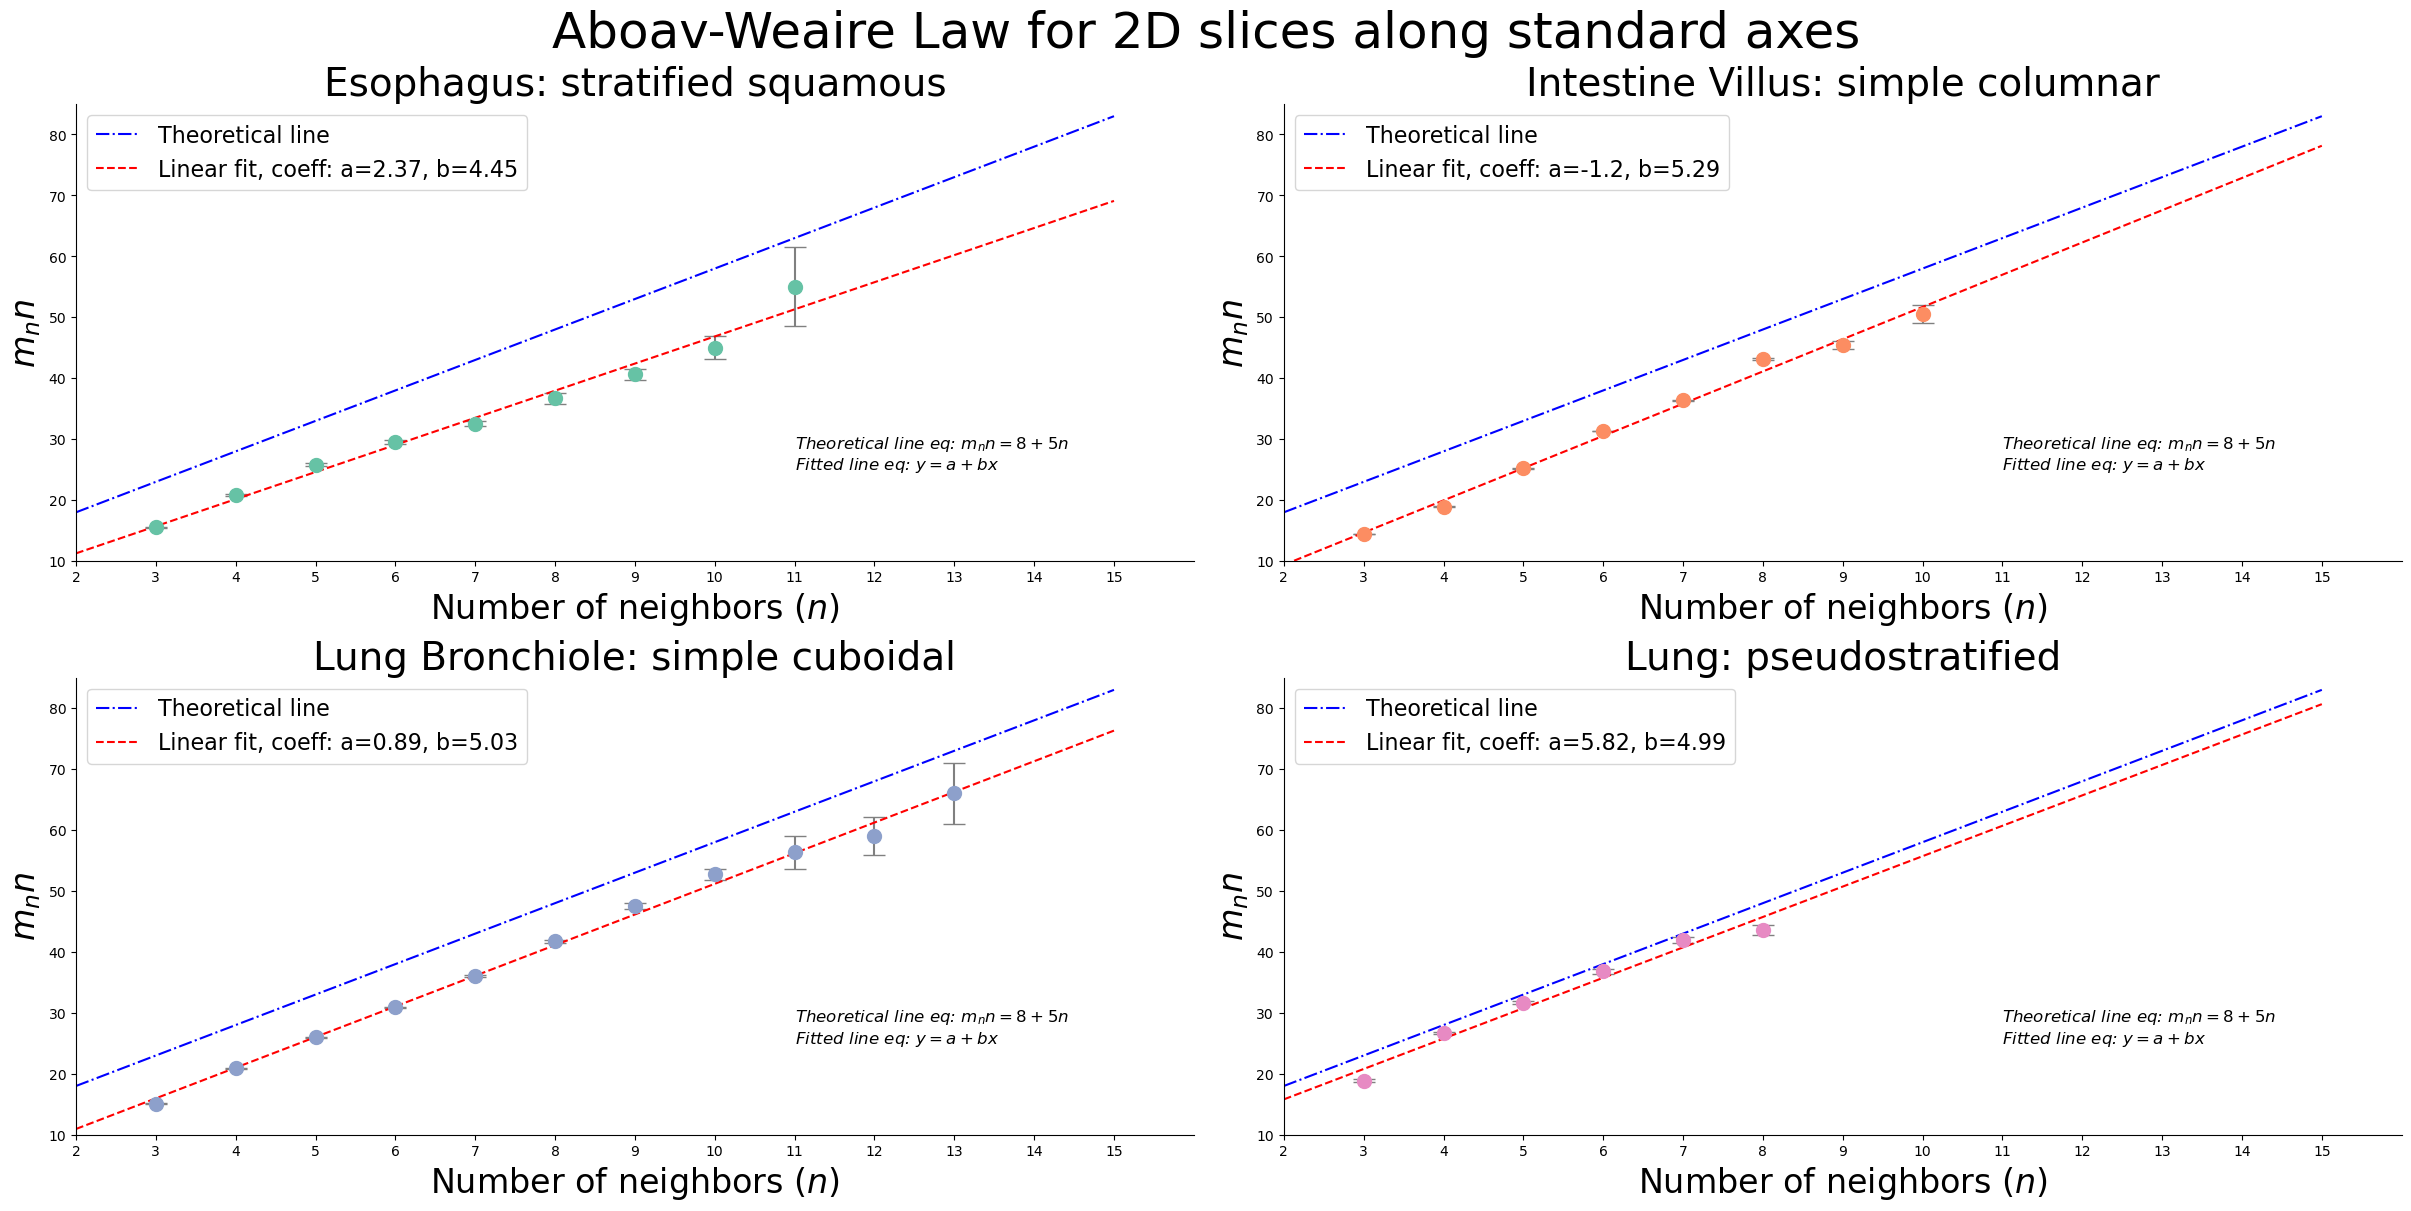

In [20]:
sp.aboav_wearie_2D_plots(
    df=cell_stats_df,
    version='standard',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.8. Plots of 2D statistics along apical-basal axis of cells

#### 3.8.1. Lewis Law plots

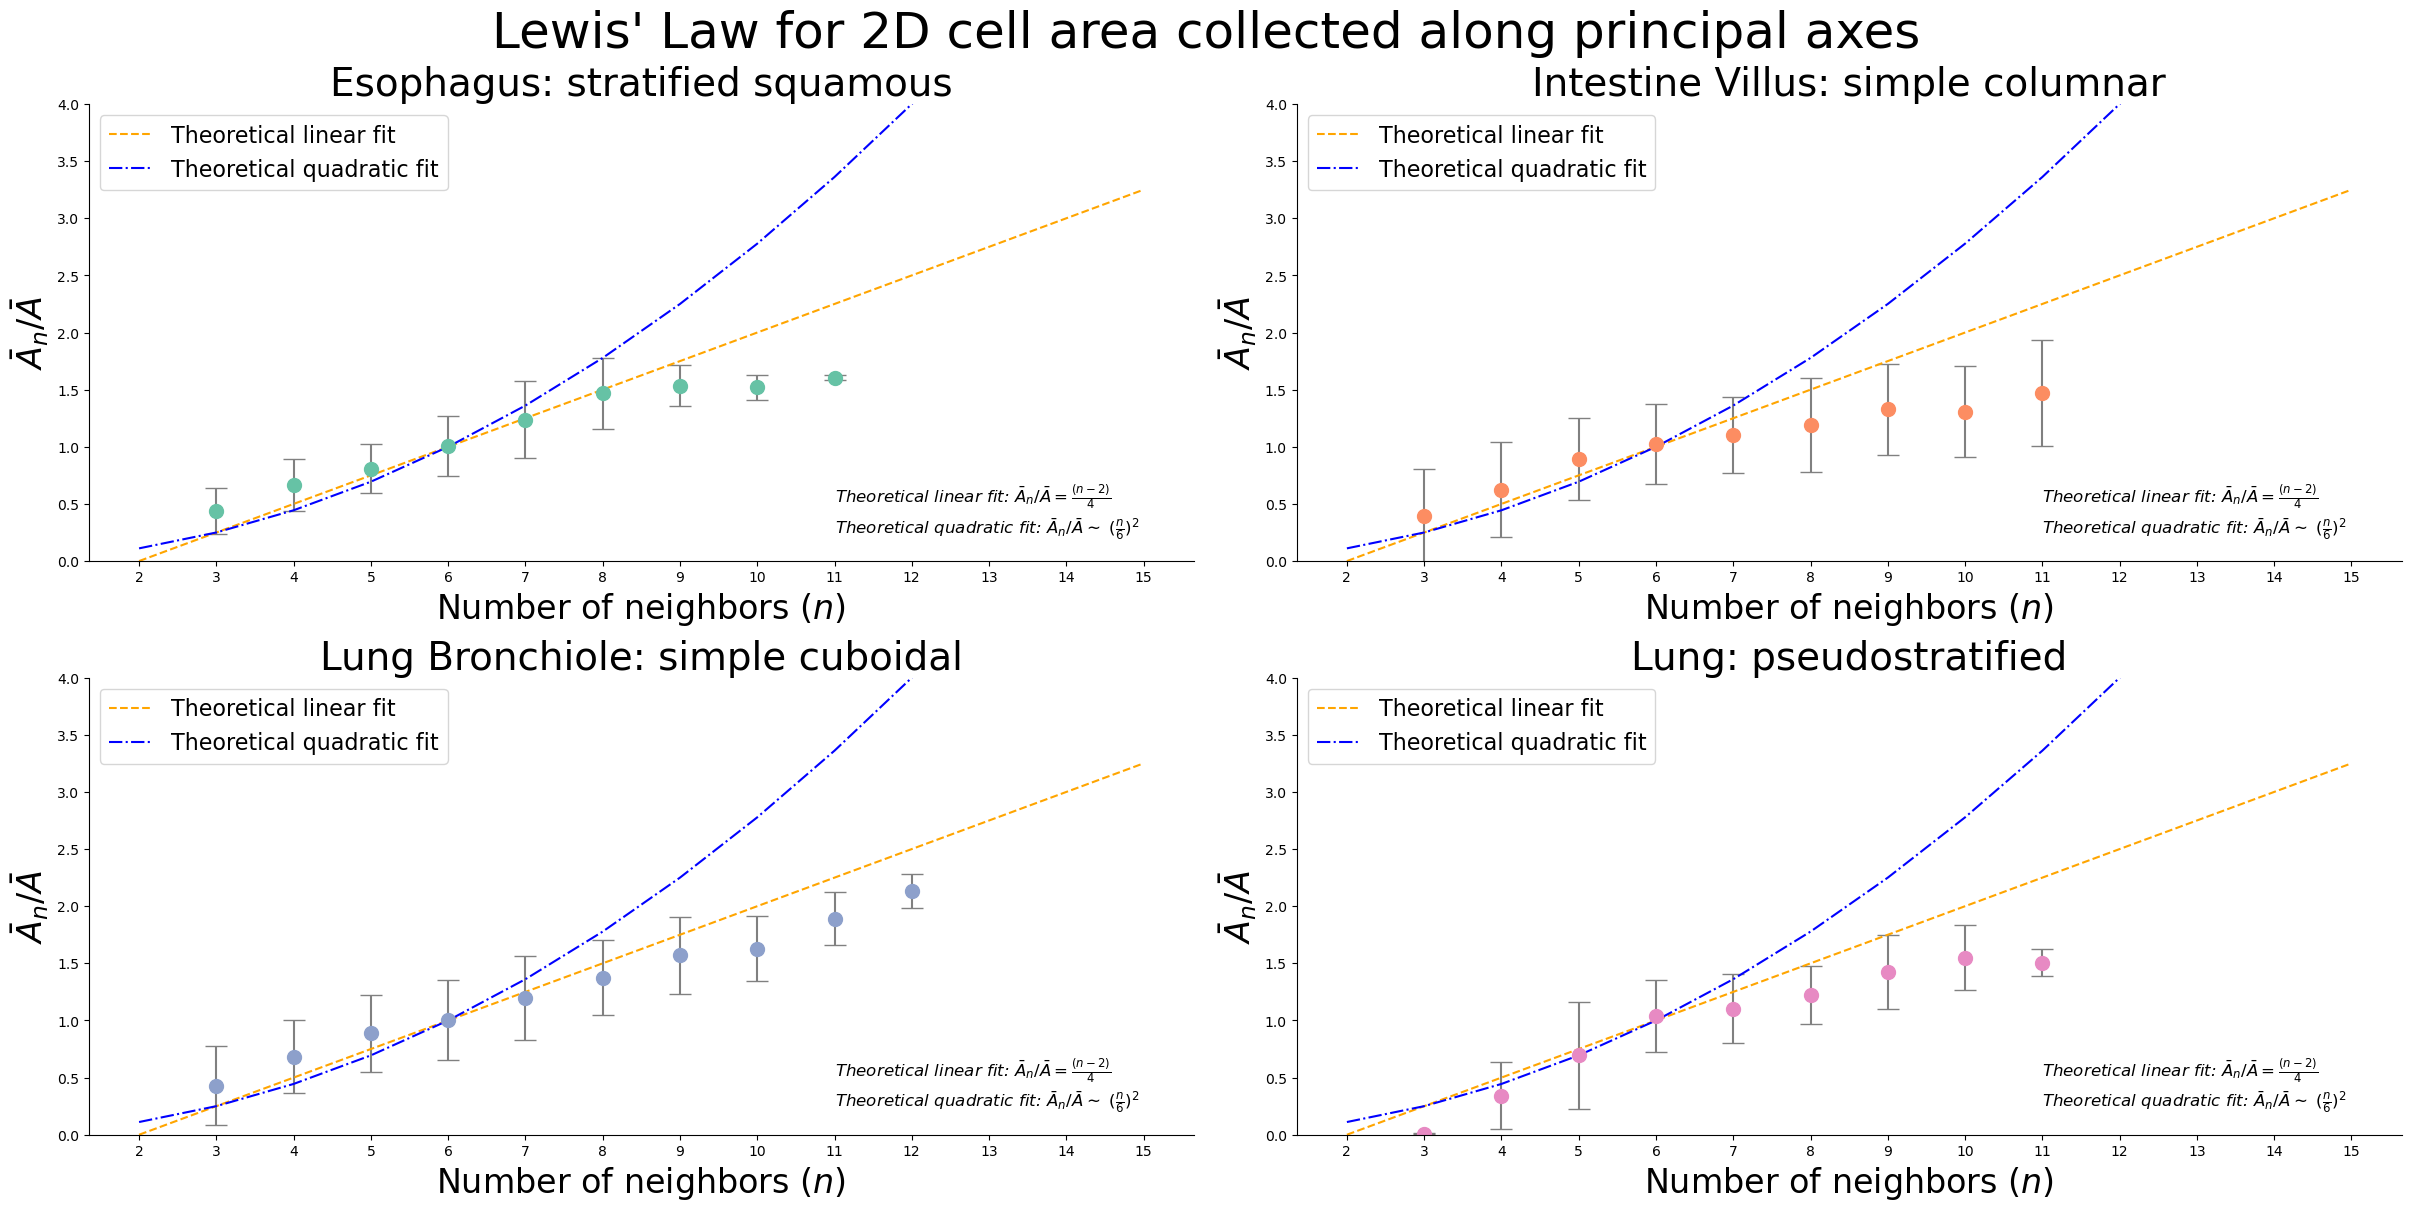

In [21]:
sp.lewis_law_2D_plots(
    df=cell_stats_df,
    fit_degrees=None,
    version='principal',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir, 
    show=True
)

#### 3.8.2. Aboav-Weaire Law plots

The Aboav-Weaire law states that the average number of neighbours of all n cells that border a cell with n neighbours follows:

$$ m(n) = 5 + \frac{8}{n}$$

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: esophagus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 125/125 [00:00<00:00, 21562.33it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: intestine_villus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 310/310 [00:00<00:00, 17271.06it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung_bronchiole
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 172/172 [00:00<00:00, 18003.55it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 143/143 [00:00<00:00, 20237.04it/s]


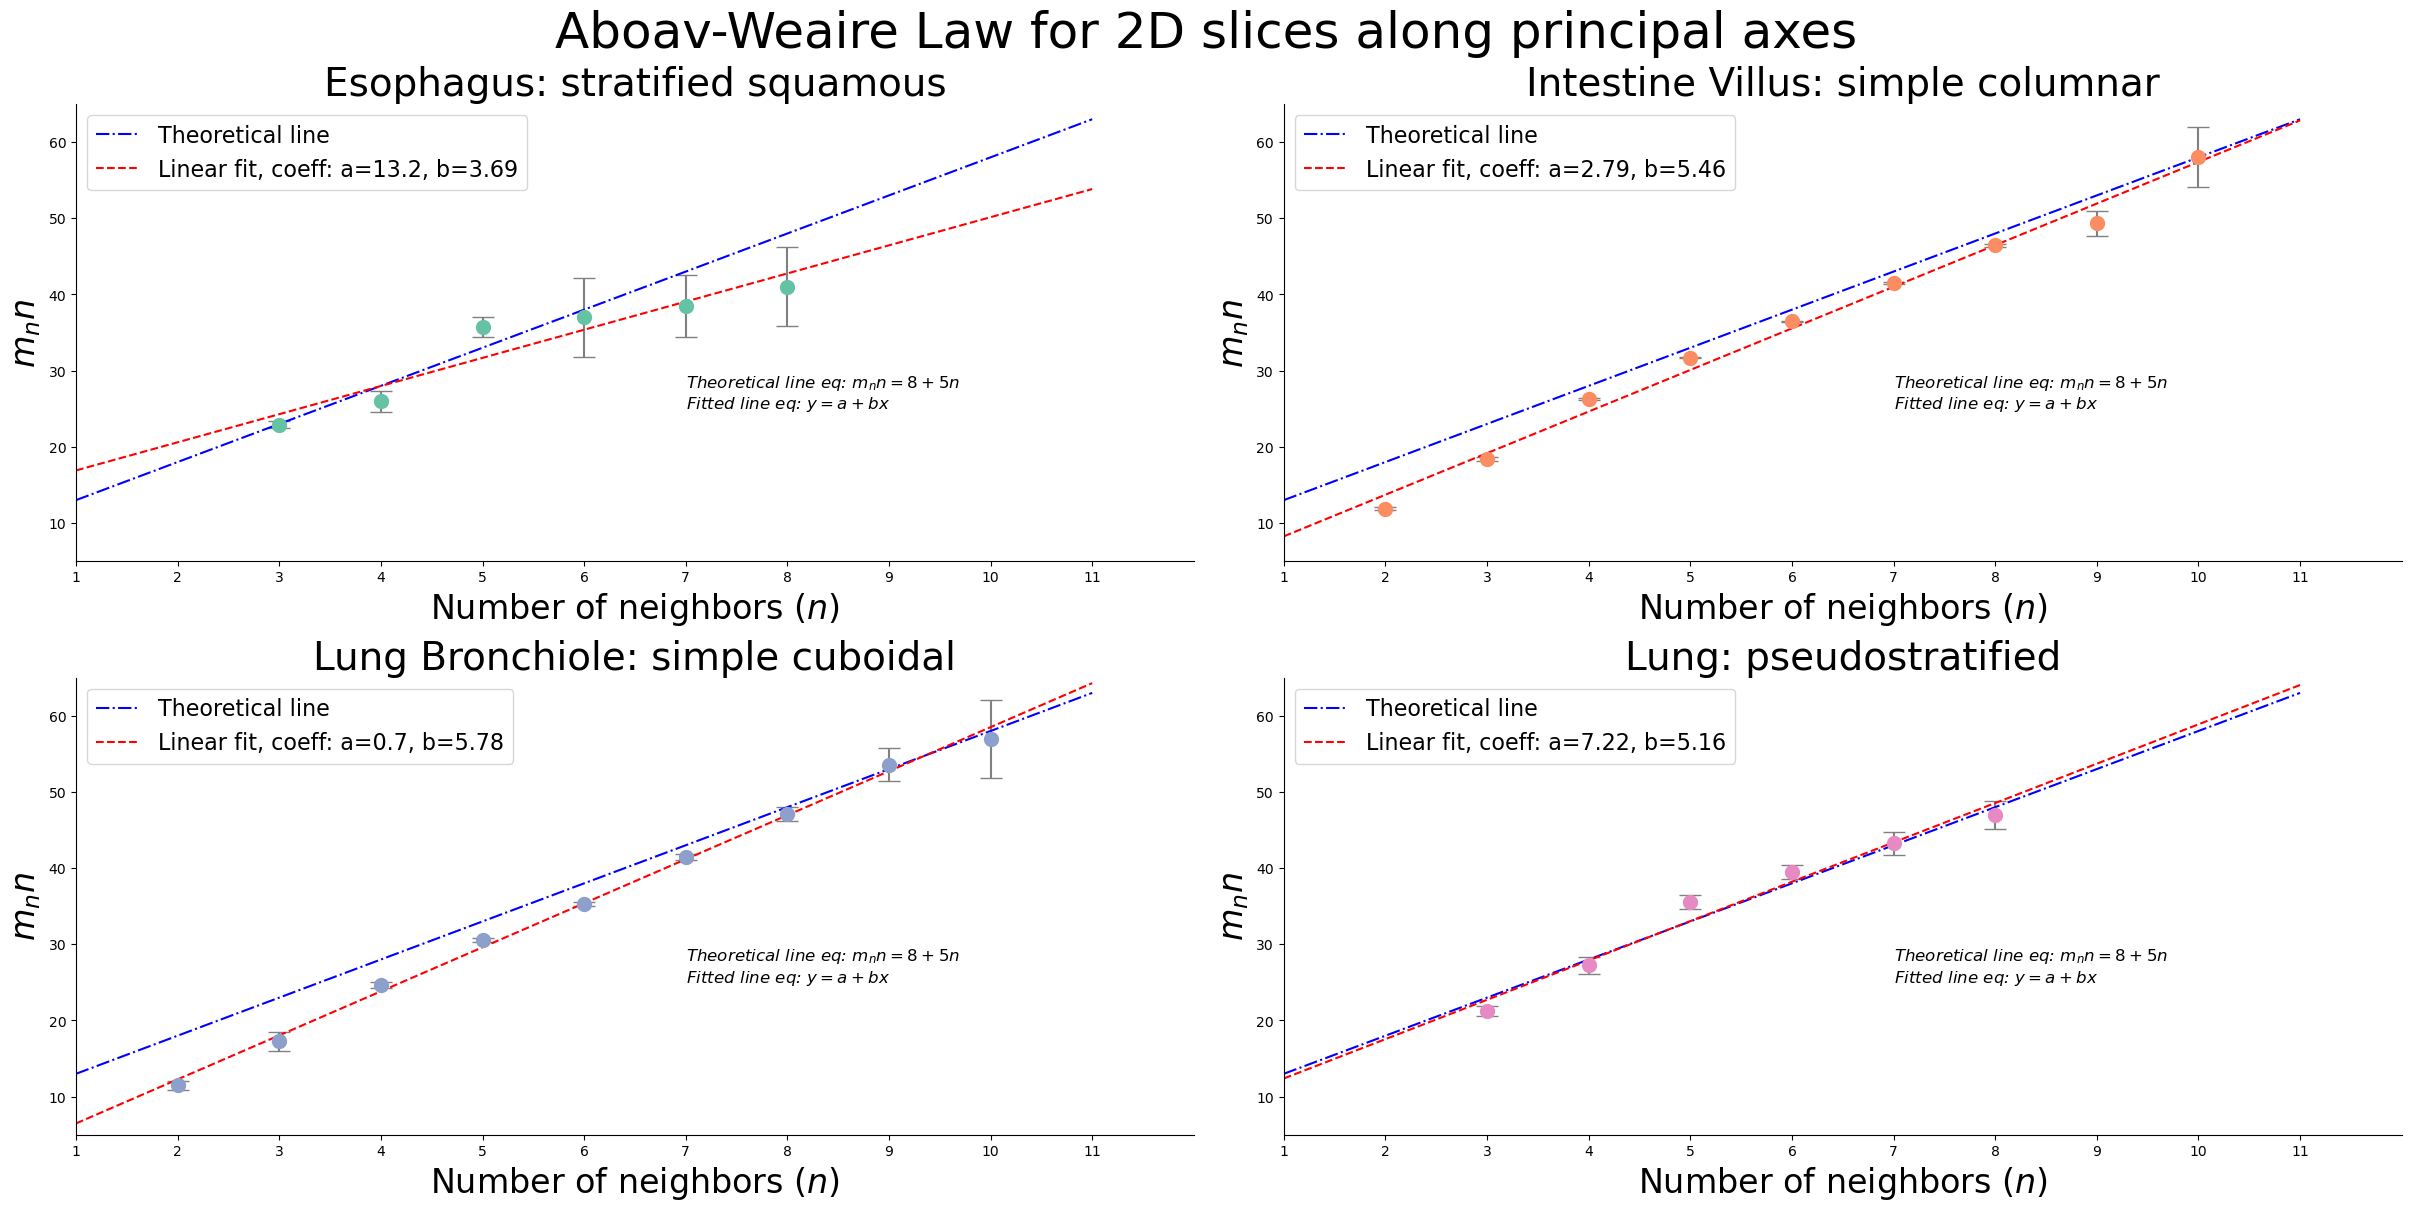

In [28]:
sp.aboav_wearie_2D_plots(
    df=cell_stats_df,
    version='principal',
    fitted=True,
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)